# Statistics & Probability

### Imports

Imports need to be made when starting the notebook.

In [3]:
import pyreadr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages
from rpy2.robjects import pandas2ri

## AER Package

In [6]:
# Import the AER package
AER = rpackages.importr('AER')

# Load the Grunfeld dataset
grunfeld_rdf = ro.r('data("Grunfeld", package = "AER"); Grunfeld')

# Convert the R dataframe to a pandas dataframe
pandas2ri.activate()
grunfeld_df = pandas2ri.rpy2py(grunfeld_rdf)

print(grunfeld_df)

      invest     value  capital  firm  year
1    317.600  3078.500    2.800     1  1935
2    391.800  4661.700   52.600     1  1936
3    410.600  5387.100  156.900     1  1937
4    257.700  2792.200  209.200     1  1938
5    330.800  4313.200  203.400     1  1939
..       ...       ...      ...   ...   ...
216    4.770    36.494   75.847    11  1950
217    6.532    46.082   77.367    11  1951
218    7.329    57.616   78.631    11  1952
219    9.020    57.441   80.215    11  1953
220    6.281    47.165   83.788    11  1954

[220 rows x 5 columns]


### Basic Line Plot

16
16


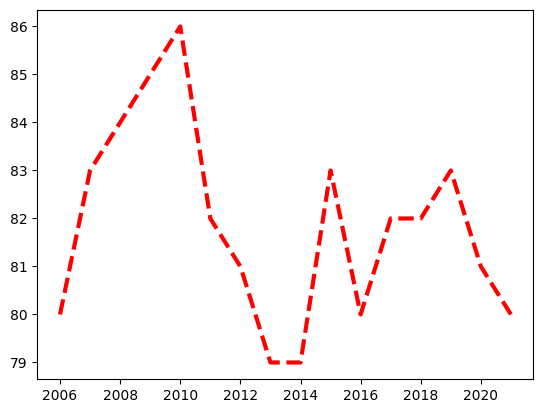

In [3]:
years = [2006 + x for x in range(16)]
weight = [80, 83, 84, 85, 86, 82, 81, 79, 79, 83, 80, 82, 82, 
          83, 81, 80]

print(len(years))
print(len(weight))

# plt.plot shows a line graph - standart behaviour
plt.plot(years, weight, c='r', lw=3, linestyle='--')
plt.show()

### Basic Bar Plot

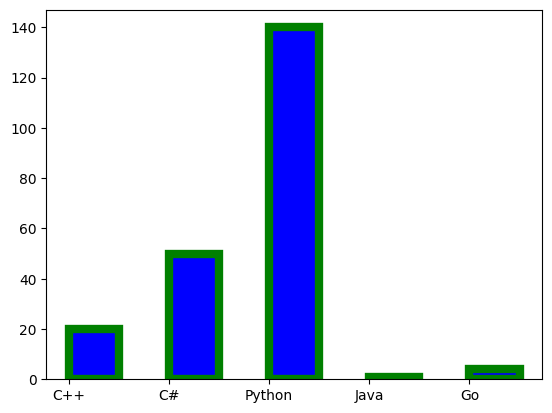

In [4]:
x = ['C++', 'C#', 'Python', 'Java', 'Go']
y = [20, 50, 140, 1, 4]

plt.bar(x, y, color='blue', align='edge', width=0.5, edgecolor='green', linewidth=6)
plt.show()

In [5]:
# Importing Data on Mac and Fedora:
rdata_import = pyreadr.read_r('~/GitHub/FHNW-2023/Statistics/data/SimpleReg.RData')

In [ ]:
# Importing Data on Windows:
rdata_import = pyreadr.read_r('//mac/GitHub/FHNW-2023/Statistics/data/SimpleReg.RData')

odict_keys(['dat'])
      TENANT RENT  HOUSEHOLD_INCOME
0      owner  NaN      15700.280447
1     tenant  450       8724.000000
2     tenant  383      46234.738788
3      owner  NaN       9602.000000
4      owner  NaN      13204.668742
...      ...  ...               ...
2255   owner  NaN      31281.600000
2256   owner  NaN      33799.347338
2257   owner  NaN      15500.000000
2258   owner  NaN      57155.307740
2259   owner  NaN      67895.600000

[2260 rows x 3 columns]
Empty DataFrame
Columns: [TENANT, RENT, HOUSEHOLD_INCOME]
Index: []


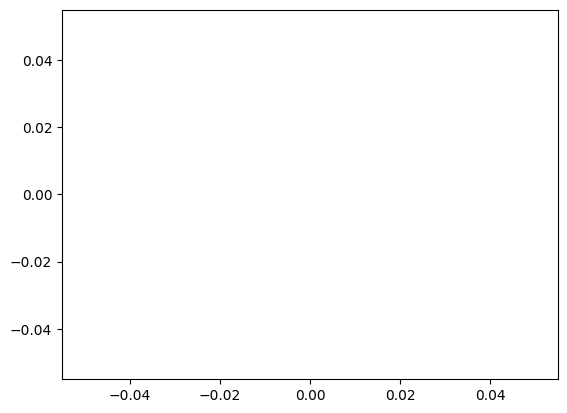

In [6]:
print(rdata_import.keys())
df1 = (rdata_import['dat'])
print(df1)

def to_numeric_and_dropna(column):
    return pd.to_numeric(column, errors='coerce')

df_numeric = df1.apply(to_numeric_and_dropna).dropna()
print(df_numeric)

plt.scatter(np.log(df_numeric['RENT']), np.log(df_numeric['HOUSEHOLD_INCOME']), c='red')
plt.show()

### Linear regression with sklearn


Read a Text File (Tab Separtor) on Mac:

In [3]:
# Read a text file with tab as separator (Mac)
df = pd.read_csv('~/GitHub/FHNW-2023/Statistics/data/housingprices.txt',  sep='\t')

Read a Text File (Tab Separtor) on Windows:

In [6]:
# Read a text file with tab as separator (Windows)
df = pd.read_csv('//mac/GitHub/FHNW-2023/Statistics/data/ticketprices.txt',  sep='\t')

In [ ]:
# Visualize content of dataframe
print(df)

In [ ]:
# Create Boxplot
boxplot = df.boxplot(column = 'Price', by='Bedrooms')
boxplot.set_ylabel('Price')
boxplot.set_xlabel('Bedrooms')
plt.show()

In [67]:
# Independent Variable X (Provide)
x = df[['Bedrooms']]

# Dependent Variable Y (Predict)
y = df[['Price']]

In [ ]:
# Find the mean linear regression of all the values
model = LinearRegression()
model.fit(x,y)

In [ ]:
# Plot the values and linear regression
plt.scatter(x,y)
plt.plot(x, model.predict(x), c='r')

In [ ]:
# Print y-intercept
# One dimensional array - specify which element before convert. to int
print('y-Intercept = ' + str(int(model.intercept_[0])))

# Print slope
# Two dimensional array - specify which element before convert. to int
print('Slope = ' + str(int(model.coef_[0][0])))

In [ ]:
# Predict certain value
def predicted_y(value):
    predict = model.coef_ * value + model.intercept_
    return predict

# Insert value into function
int(predicted_y(3)[0][0])

### Multiple Regression Model

In [ ]:
# Read a text file with tab as separator (Windows)
df = pd.read_csv('//mac/GitHub/FHNW-2023/Statistics/data/ticketprices.txt',  sep='\t')

In [14]:
# Visualize content of dataframe
print(df)

        Date Receipts  Paid Attendance  Shows  Avg Ticket Price
0   5/1/2007  18.6859          259.181     36             72.10
1   6/1/2007  20.4195          281.296     36             72.59
2   6/1/2007  20.0656          271.121     34             74.01
3   6/1/2007  20.4281          272.258     33             75.03
4   6/1/2007  19.6621          263.937     31             73.50
..       ...      ...              ...    ...               ...
87  5/1/2007  22.8968          299.117     38             76.55
88  5/1/2007  20.6534          278.326     38             74.20
89  5/1/2007  20.0948          266.067     37             75.52
90  6/1/2007  20.8585          272.599     37             76.52
91  6/1/2007  22.1877          283.315     36             78.87

[92 rows x 5 columns]


#### Define Variables

In [11]:
# Variable 1 (Provide)
a = df[['Date']] 

# Variable 2 (Provide)
b = df[['Receipts']]

# Variable 3 (Provide)
c = df[['Paid Attendance']]

# Variable 4 (Provide)
d = df[['Shows']]

# Variable 5 (Provide)
e = df[['Avg Ticket Price']]

# Variable 6 (Provide)
#f = df[['']]

# Variable 7 (Provide)
#g = df[['']]

# Variable 8 (Provide)
#h = df[['']]

In [ ]:
# Define dependent variable
Y = df['Paid Attendance']

# Define independent variables
X = df[['Date', 'Receipts', 'Shows', 'Avg Ticket Price']]

# Create a Linear Regression object
lm = LinearRegression()

# Fit the model to the data
lm.fit(X, Y)

# Print out the coefficients
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

### Class Exercise Law of Lagre Numbers

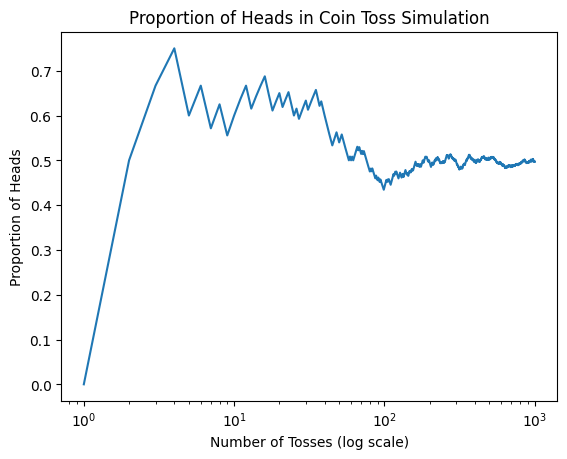

In [18]:
# Show the approximation to 0.5 with a large number of tosses
# Empirical Probability
# Number of tosses
n_tosses = 1000

# Simulate coin tosses (0 = tails, 1 = heads)
tosses = np.random.randint(0, 2, size=n_tosses)

# Calculate cumulative sum of heads
cumulative_heads = np.cumsum(tosses)

# Calculate proportion of heads
proportion_heads = cumulative_heads / np.arange(1, n_tosses + 1)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the proportion of heads
ax.semilogx(np.arange(1, n_tosses + 1), proportion_heads)

# Set labels and title
ax.set_xlabel('Number of Tosses (log scale)')
ax.set_ylabel('Proportion of Heads')
ax.set_title('Proportion of Heads in Coin Toss Simulation')

# Show the plot
plt.show()
